# **Recidivism Reduction: A Data-Driven Business Analysis Project**

## Project Overview
Analyzing recidivism data to identify key factors influencing reoffending rates and develop a predictive model for recidivism within three years of release.

## Business Context
Recidivism poses significant challenges to public safety, strains criminal justice resources, and hinders successful reintegration of formerly incarcerated individuals. By leveraging data analytics, we aim to provide actionable insights that can drive policy decisions, optimize resource allocation, and improve rehabilitation programs.

## Objectives
1. Conduct a comprehensive analysis of recidivism patterns and trends.
2. Identify key demographic, socioeconomic, and behavioral factors influencing recidivism.
3. Develop a predictive model to forecast recidivism risk.

## Key Business Questions
1. What is the current recidivism rate, and how does it vary across different segments?
2. Which factors have the most significant impact on recidivism rates?
3. How can we identify high-risk individuals for targeted interventions?

## Methodology
1. Data Preparation and Cleaning
   - Ensure data quality and consistency
   - Handle missing values

2. Exploratory Data Analysis (EDA)
   - Analyze distributions and relationships between variables
   - Identify initial patterns and trends

3. Statistical Analysis
   - Conduct correlation analyses

4. Predictive Modeling
   - Develop and validate a recidivism risk prediction model
   - Evaluate model performance and refine as needed


 # **DATA LOADING**

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/NIJ_s_Recidivism_Challenge_Full_Dataset.csv")

In [ ]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
data.head()

First few rows of the dataset:


,ID,Gender,Race,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,...,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years,Recidivism_Arrest_Year1,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3,Training_Sample
0,1,M,BLACK,43-47,16,False,3.0,Standard,At least some college,3 or more,...,0.000000,0.0,0.488562,0.447610,False,False,False,False,False,1
1,2,M,BLACK,33-37,16,False,6.0,Specialized,Less than HS diploma,1,...,0.000000,0.0,0.425234,2.000000,False,True,False,False,True,1
2,3,M,BLACK,48 or older,24,False,7.0,High,At least some college,3 or more,...,0.166667,0.0,0.000000,0.000000,False,True,False,True,False,1
3,4,M,WHITE,38-42,16,False,7.0,High,Less than HS diploma,1,...,0.000000,0.0,1.000000,0.718996,False,False,False,False,False,1
4,5,M,WHITE,33-37,16,False,4.0,Specialized,Less than HS diploma,3 or more,...,0.058824,0.0,0.203562,0.929389,False,True,True,False,False,1


# **DATA CLEANING**

Define Helper Functions and Initial Data Exploration

In [ ]:
def get_shape_dtypes_and_nulls(dataframe):
    shape = dataframe.shape
    dtypes = dataframe.dtypes
    nulls = dataframe.isnull().sum()
    combined = pd.DataFrame({'Data Type': dtypes, 'Missing Values': nulls})
    return shape, combined


In [ ]:
# Check the shape, get a summary of the data types, and check for missing values
shape, combined_info = get_shape_dtypes_and_nulls(data)
print("\nShape of the dataset:")
print(shape)
print("\nData types and missing values of each column:")
print(combined_info)


Shape of the dataset:
(25835, 54)

Data types and missing values of each column:
                                                  Data Type  Missing Values
ID                                                    int64               0
Gender                                               object               0
Race                                                 object               0
Age_at_Release                                       object               0
Residence_PUMA                                        int64               0
Gang_Affiliated                                      object            3167
Supervision_Risk_Score_First                        float64             475
Supervision_Level_First                              object            1720
Education_Level                                      object               0
Dependents                                           object               0
Prison_Offense                                       object            3277
Prison

In [ ]:
# Drop unnecessary columns
data = data.drop(columns=['ID',
                          'Gang_Affiliated',
                          'Supervision_Level_First',
                          'Prison_Offense',
                          'Avg_Days_per_DrugTest',
                          'DrugTests_THC_Positive',
                          'DrugTests_Cocaine_Positive',
                          'DrugTests_Meth_Positive',
                          'DrugTests_Other_Positive',
                          'Training_Sample'])

In [ ]:
# Convert relevant columns to numeric data types
age_mapping = {
    '18-22': 20, '23-27': 25, '28-32': 30, '33-37': 35, '38-42': 40, '43-47': 45, '48 or older': 50
}
data['Age_at_Release'] = data['Age_at_Release'].map(age_mapping).astype(int)

prison_years_mapping = {
    'Less than 1 year': 0.5, '1-2 years': 1.5, 'Greater than 2 to 3 years': 2.5, 'More than 3 years': 4, '10 or more': 10
}
data['Prison_Years'] = data['Prison_Years'].replace(prison_years_mapping).astype(float)

# Convert '10 or more' in Prior_Arrest_Episodes_Felony to 10
data['Prior_Arrest_Episodes_Felony'] = data['Prior_Arrest_Episodes_Felony'].replace('10 or more', 10).astype(int)

In [ ]:
# Check the missing values
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
print(pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage}))

                                                   Missing Values  Percentage
Gender                                                          0    0.000000
Race                                                            0    0.000000
Age_at_Release                                                  0    0.000000
Residence_PUMA                                                  0    0.000000
Supervision_Risk_Score_First                                  475    1.838591
Education_Level                                                 0    0.000000
Dependents                                                      0    0.000000
Prison_Years                                                    0    0.000000
Prior_Arrest_Episodes_Felony                                    0    0.000000
Prior_Arrest_Episodes_Misd                                      0    0.000000
Prior_Arrest_Episodes_Violent                                   0    0.000000
Prior_Arrest_Episodes_Property                                  

In [ ]:
from sklearn.impute import SimpleImputer

# Initialize the imputer for mean strategy
mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')

# Impute missing values
data['Percent_Days_Employed'] = mean_imputer.fit_transform(data[['Percent_Days_Employed']])
data['Jobs_Per_Year'] = median_imputer.fit_transform(data[['Jobs_Per_Year']])
data['Supervision_Risk_Score_First'] = mean_imputer.fit_transform(data[['Supervision_Risk_Score_First']])

In [ ]:
# Check the shape, get a summary of the data types, and check for missing values
shape, combined_info = get_shape_dtypes_and_nulls(data)
print("\nShape of the dataset:")
print(shape)
print("\nData types and missing values of each column:")
print(combined_info)


Shape of the dataset:
(25835, 44)

Data types and missing values of each column:
                                                  Data Type  Missing Values
Gender                                               object               0
Race                                                 object               0
Age_at_Release                                        int64               0
Residence_PUMA                                        int64               0
Supervision_Risk_Score_First                        float64               0
Education_Level                                      object               0
Dependents                                           object               0
Prison_Years                                        float64               0
Prior_Arrest_Episodes_Felony                          int64               0
Prior_Arrest_Episodes_Misd                            int64               0
Prior_Arrest_Episodes_Violent                         int64               0
Prior_

# **Descriptive Statistics**

In [ ]:
# Calculate overall recidivism rate
recidivism_rate = data['Recidivism_Within_3years'].mean()
print(f"Overall Recidivism Rate: {recidivism_rate:.2f}")

Overall Recidivism Rate: 0.58


In [ ]:
# Recidivism rate by gender
recidivism_rate_by_gender = data.groupby('Gender')['Recidivism_Within_3years'].mean()
print("Recidivism Rate by Gender:")
print(recidivism_rate_by_gender)

Recidivism Rate by Gender:
Gender
F    0.455320
M    0.593877
Name: Recidivism_Within_3years, dtype: float64


In [ ]:
# Recidivism rate by race
recidivism_rate_by_race = data.groupby('Race')['Recidivism_Within_3years'].mean()
print("Recidivism Rate by Race:")
print(recidivism_rate_by_race)

Recidivism Rate by Race:
Race
BLACK    0.586853
WHITE    0.563433
Name: Recidivism_Within_3years, dtype: float64


In [ ]:
# Recidivism rate by education level
recidivism_rate_by_education = data.groupby('Education_Level')['Recidivism_Within_3years'].mean()
print("Recidivism Rate by Education Level:")
print(recidivism_rate_by_education)

Recidivism Rate by Education Level:
Education_Level
At least some college    0.448208
High School Diploma      0.604214
Less than HS diploma     0.605488
Name: Recidivism_Within_3years, dtype: float64


In [ ]:
# Frequency distribution for categorical columns
categorical_columns = ['Gender', 'Race', 'Education_Level', 'Dependents']
print("Frequency distribution for categorical columns:")
for col in categorical_columns:
    print(f"\n{col} distribution:")
    print(data[col].value_counts())

Frequency distribution for categorical columns:

Gender distribution:
Gender
M    22668
F     3167
Name: count, dtype: int64

Race distribution:
Race
BLACK    14847
WHITE    10988
Name: count, dtype: int64

Education_Level distribution:
Education_Level
High School Diploma      11390
Less than HS diploma      9840
At least some college     4605
Name: count, dtype: int64

Dependents distribution:
Dependents
0            8037
3 or more    7782
1            5369
2            4647
Name: count, dtype: int64


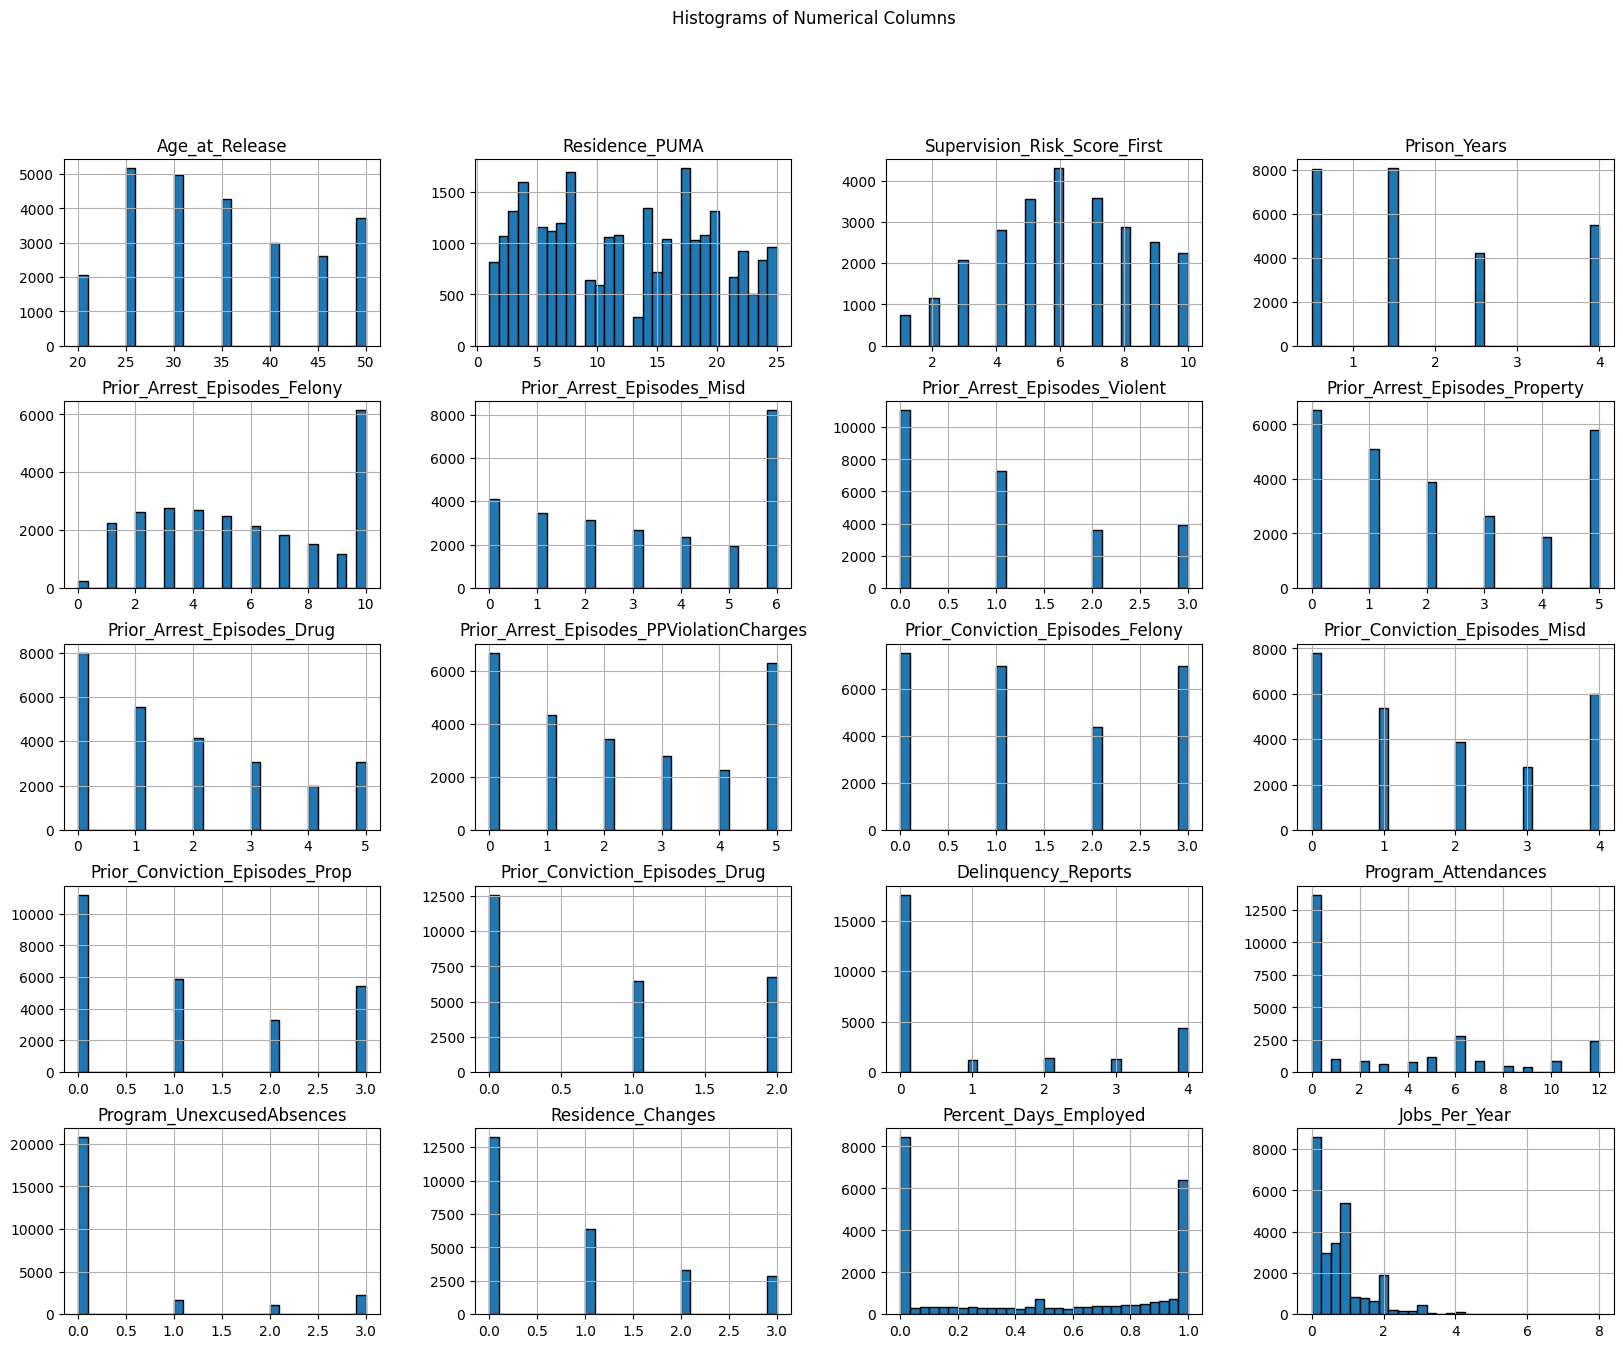

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical variables
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_columns].hist(figsize=(20, 15), bins=30, edgecolor='black')
plt.suptitle('Histograms of Numerical Columns')
plt.show()


### Detailed Analysis of Histograms

1. **Age at Release**:
    - The age distribution of released individuals appears to be somewhat uniform across the ages, with slight peaks at specific ages. This suggests that individuals are released at various ages, and there isn't a specific age group that dominates the dataset.

2. **Residence PUMA**:
    - The distribution shows significant variation across different PUMA (Public Use Microdata Areas) codes. This indicates that the individuals in the dataset are distributed across multiple geographic regions.

3. **Supervision Risk Score First**:
    - The risk scores have a relatively even distribution but with peaks at certain scores. This could indicate common risk levels that need closer examination to understand their implications.

4. **Prison Years**:
    - Most individuals have served between 0 to 2 years, with fewer individuals serving longer sentences. This might suggest a predominance of shorter-term incarcerations.

5. **Prior Arrest Episodes Felony**:
    - The majority of individuals have few prior felony arrests, with the number decreasing as the count of prior felonies increases. This is a typical pattern showing that fewer individuals have a high number of felony arrests.

6. **Prior Arrest Episodes Misdemeanor**:
    - There is a significant drop after the first few misdemeanor arrests, indicating that most individuals have fewer misdemeanor arrests.

7. **Prior Arrest Episodes Violent**:
    - The number of prior violent arrest episodes is low for most individuals, suggesting violent crimes are less frequent in this dataset.

8. **Prior Arrest Episodes Property**:
    - Similar to violent arrests, property crime arrests are fewer in number.

9. **Prior Arrest Episodes Drug**:
    - Drug-related arrests show a decreasing trend as the number of prior episodes increases.

10. **Prior Arrest Episodes PPViolationCharges**:
    - Probation/Parole violation charges are relatively low, with most individuals having very few or none.

11. **Prior Conviction Episodes Felony**:
    - Felony convictions are low, mirroring the pattern seen in felony arrests.

12. **Prior Conviction Episodes Misdemeanor**:
    - Misdemeanor convictions also show a declining trend with an increasing number of episodes.

13. **Prior Conviction Episodes Property**:
    - Property crime convictions are relatively infrequent.

14. **Prior Conviction Episodes Drug**:
    - Drug convictions show a decreasing trend, similar to drug arrests.

15. **Delinquency Reports**:
    - The majority of individuals have few or no delinquency reports, suggesting good compliance with terms set by supervision.

16. **Program Attendances**:
    - Most individuals have attended very few programs, indicating either a lack of access to programs or limited participation.

17. **Program Unexcused Absences**:
    - There are very few unexcused absences from programs, suggesting high compliance or good attendance tracking.

18. **Residence Changes**:
    - Most individuals have not changed residence frequently, indicating stability in their living situations.

19. **Percent Days Employed**:
    - Employment days percentage is skewed towards the lower and higher ends, showing that individuals either have high employment or low employment with few in the middle range.

20. **Jobs Per Year**:
    - Most individuals have few jobs per year, indicating either stable employment or difficulty in maintaining jobs.

### Insights

- **Recidivism Patterns**:
    - The data shows a clear pattern where fewer individuals have a high number of prior arrests or convictions across all categories (felony, misdemeanor, violent, property, drug).
    - Drug-related issues are prominent but decrease with more episodes, indicating possible interventions after initial arrests.
    - Employment stability appears to be a critical factor, with a significant number of individuals either being highly employed or not at all.

- **Implications for Predictive Modeling**:
    - The skewness and distributions suggest that most individuals might have a lower recidivism risk, but specific factors such as prior arrests, employment stability, and program participation could be critical predictors.
    - The data will require careful handling of outliers and potentially imbalanced classes, especially for predictive modeling.

# **Identify Key Factors Influencing Recidivism**

Correlation Analysis

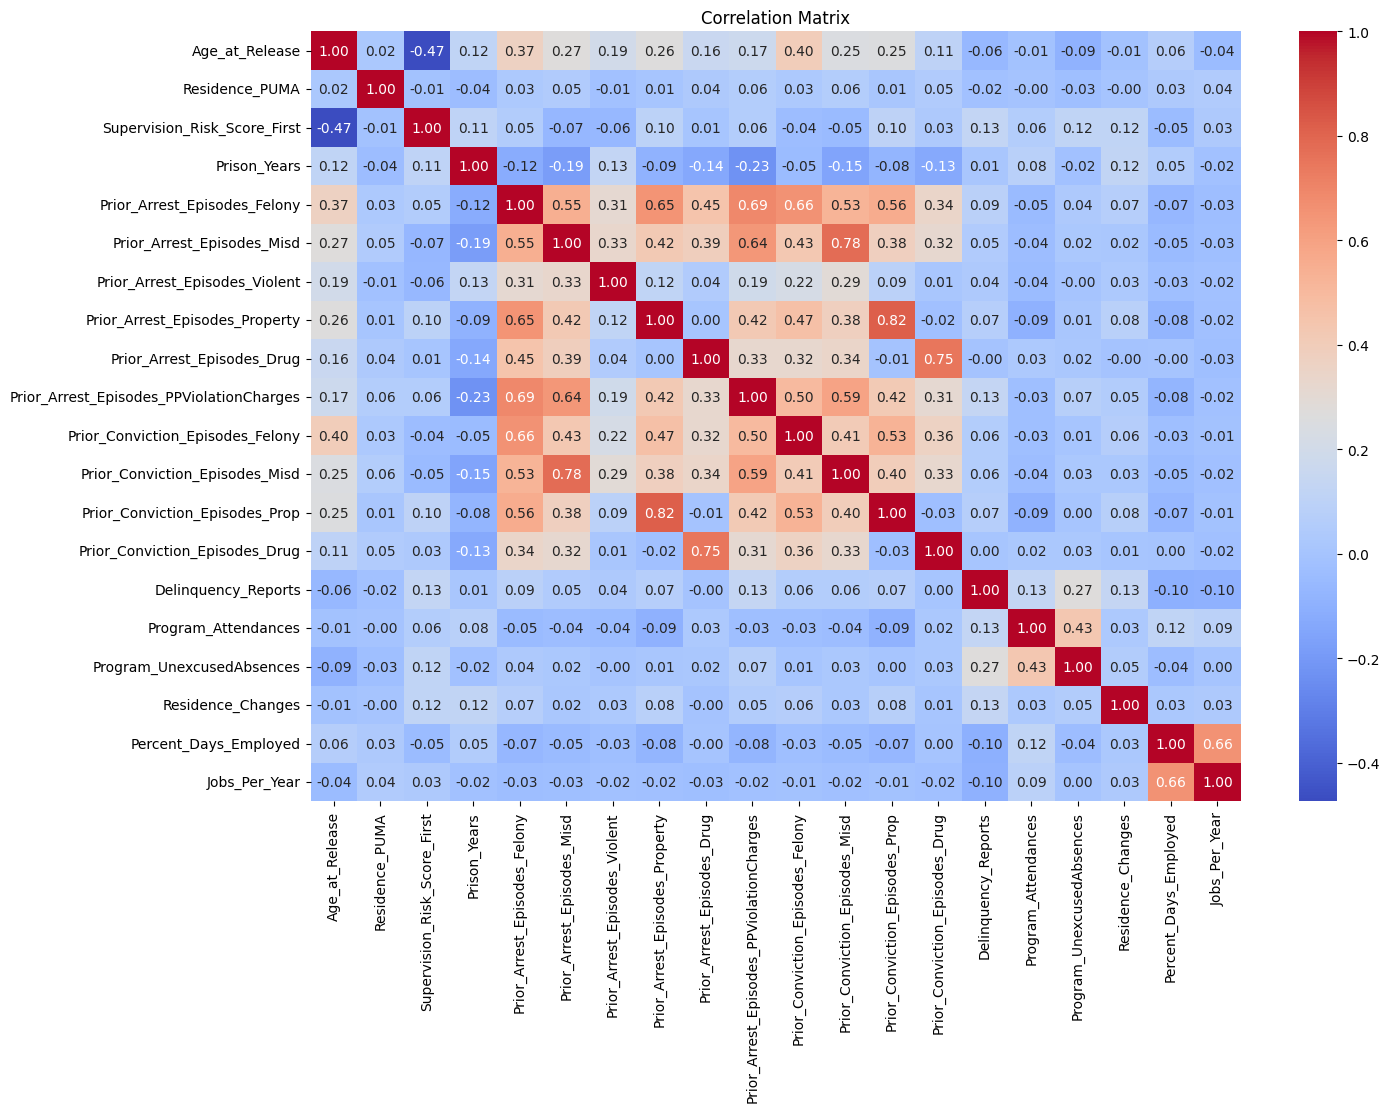

In [ ]:
# Correlation heatmap
plt.figure(figsize=(15, 10))
# Select only numerical columns for correlation calculation
numerical_data = data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Interpretation of the Correlation Heatmap

#### Strong Correlations
1. **Prior Conviction Episodes (Felony) and Prior Arrest Episodes (Felony)**:
   - Correlation: 0.69
   - This strong positive correlation indicates that individuals with more prior felony arrests tend to have more prior felony convictions, which is expected as arrests often lead to convictions.

2. **Prior Conviction Episodes (Misd) and Prior Arrest Episodes (Misd)**:
   - Correlation: 0.78
   - Similar to the felony correlation, there is a strong positive relationship between prior misdemeanor arrests and convictions.

3. **Prior Conviction Episodes (Property) and Prior Arrest Episodes (Property)**:
   - Correlation: 0.82
   - There is a very strong correlation between property crime arrests and convictions, suggesting consistency in the legal process for these types of crimes.

4. **Prior Conviction Episodes (Drug) and Prior Arrest Episodes (Drug)**:
   - Correlation: 0.75
   - Drug-related arrests and convictions also show a strong positive correlation, indicating a high likelihood of conviction following an arrest for drug-related offenses.

#### Moderate Correlations
1. **Supervision Risk Score First and Age at Release**:
   - Correlation: -0.47
   - There is a moderate negative correlation indicating that younger individuals tend to have higher supervision risk scores upon first assessment.

2. **Prior Arrest Episodes (Felony) and Prior Arrest Episodes (Misd)**:
   - Correlation: 0.45
   - A moderate positive correlation suggests that individuals with more felony arrests also tend to have more misdemeanor arrests.

3. **Percent Days Employed and Jobs Per Year**:
   - Correlation: 0.66
   - A moderate positive correlation indicates that individuals who have a higher percentage of days employed tend to hold more jobs per year, possibly due to short-term or seasonal employment.

#### Weak or No Correlations
1. **Residence PUMA with Most Variables**:
   - Correlation values are close to zero for most variables, indicating that geographic location (PUMA) does not have a strong relationship with other factors in the dataset.

2. **Program Attendances and Most Variables**:
   - Correlation values are low, suggesting that attendance in programs does not strongly correlate with most other variables.

3. **Residence Changes and Most Variables**:
   - Low correlation values indicate that changes in residence do not significantly impact or relate to other factors.

#### Insights
- **Criminal History Consistency**:
  - There is a high consistency between the number of arrests and convictions across different types of crimes (felony, misdemeanor, property, drug), indicating that prior criminal behavior is a strong indicator of future convictions.
  
- **Employment Stability**:
  - The relationship between employment days and jobs per year highlights the instability or temporary nature of employment among the individuals, which could be a critical factor to address in rehabilitation programs.

- **Supervision and Age**:
  - Younger individuals tend to have higher risk scores, which may reflect the challenges they face in complying with supervision terms or the likelihood of reoffending.

Chi-Square Tests

In [ ]:
from scipy.stats import chi2_contingency

# Function to perform chi-square test and print the results
def chi_square_test(data, col1, col2):
    contingency_table = pd.crosstab(data[col1], data[col2])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-Square Test between {col1} and {col2}:")
    print(f"Chi2 Statistic: {chi2}")
    print(f"P-value: {p}\n")

# Perform chi-square tests for categorical variables
categorical_columns = ['Gender', 'Race', 'Education_Level', 'Dependents']
for col in categorical_columns:
    chi_square_test(data, col, 'Recidivism_Within_3years')


Chi-Square Test between Gender and Recidivism_Within_3years:
Chi2 Statistic: 217.9872379805552
P-value: 2.4855774018412047e-49

Chi-Square Test between Race and Recidivism_Within_3years:
Chi2 Statistic: 14.093702827467807
P-value: 0.00017392508496313902

Chi-Square Test between Education_Level and Recidivism_Within_3years:
Chi2 Statistic: 380.2130803677861
P-value: 2.7401770486628414e-83

Chi-Square Test between Dependents and Recidivism_Within_3years:
Chi2 Statistic: 50.62574143182126
P-value: 5.877916128843863e-11



### Chi-Square Test Interpretation

#### Gender and Recidivism
- **Chi2 Statistic**: 217.987
- **P-value**: 2.49e-49

**Interpretation**:
- The Chi2 statistic is very high, indicating a strong association between gender and recidivism within three years.
- The p-value is extremely low (much lower than 0.05), which means we reject the null hypothesis that gender and recidivism within three years are independent.
- **Conclusion**: Gender is significantly associated with recidivism within three years.

#### Race and Recidivism
- **Chi2 Statistic**: 14.094
- **P-value**: 0.000174

**Interpretation**:
- The Chi2 statistic indicates a moderate association between race and recidivism within three years.
- The p-value is less than 0.05, so we reject the null hypothesis of independence.
- **Conclusion**: Race is significantly associated with recidivism within three years, although the association is not as strong as that for gender.

#### Education Level and Recidivism
- **Chi2 Statistic**: 380.213
- **P-value**: 2.74e-83

**Interpretation**:
- The Chi2 statistic is extremely high, indicating a very strong association between education level and recidivism within three years.
- The p-value is extremely low, so we reject the null hypothesis of independence.
- **Conclusion**: Education level is significantly associated with recidivism within three years, with a very strong relationship.

#### Dependents and Recidivism
- **Chi2 Statistic**: 50.626
- **P-value**: 5.88e-11

**Interpretation**:
- The Chi2 statistic indicates a strong association between having dependents and recidivism within three years.
- The p-value is much lower than 0.05, so we reject the null hypothesis of independence.
- **Conclusion**: Having dependents is significantly associated with recidivism within three years.

### Summary
- All the tested categorical variables (gender, race, education level, and dependents) are significantly associated with recidivism within three years, as indicated by their very low p-values.
- **Gender and Education Level** show particularly strong associations with recidivism, based on their high Chi2 statistics.

# **Predictive Modeling**

Feature Selection based on the previous analysis, we'll include key predictors.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Define the features and target variable
X = data[['Gender', 'Race', 'Education_Level', 'Dependents', 'Supervision_Risk_Score_First',
          'Prior_Arrest_Episodes_Felony', 'Prior_Arrest_Episodes_Misd', 'Prior_Arrest_Episodes_Violent',
          'Prior_Conviction_Episodes_Felony', 'Prior_Conviction_Episodes_Misd', 'Program_Attendances',
          'Program_UnexcusedAbsences', 'Delinquency_Reports']]
y = data['Recidivism_Within_3years']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocessing for numerical data
numerical_features = ['Supervision_Risk_Score_First', 'Prior_Arrest_Episodes_Felony', 'Prior_Arrest_Episodes_Misd',
                      'Prior_Arrest_Episodes_Violent', 'Prior_Conviction_Episodes_Felony',
                      'Prior_Conviction_Episodes_Misd', 'Program_Attendances', 'Program_UnexcusedAbsences',
                      'Delinquency_Reports']
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_features = ['Gender', 'Race', 'Education_Level', 'Dependents']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a preprocessor with the appropriate transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline with preprocessing and logistic regression
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(random_state=42))])

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

In [ ]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")

Accuracy: 0.65
Precision: 0.66
Recall: 0.81
F1 Score: 0.73
ROC AUC Score: 0.69


#### Model Performance Metrics
1. **Accuracy: 0.65**
   - This means that 65% of the predictions made by the model are correct.

2. **Precision: 0.66**
   - Precision is the ratio of correctly predicted positive observations to the total predicted positives. A precision of 0.66 indicates that 66% of the individuals predicted to reoffend within three years actually do.

3. **Recall: 0.81**
   - Recall (or sensitivity) is the ratio of correctly predicted positive observations to all the actual positives. A recall of 0.81 indicates that the model correctly identifies 81% of the individuals who reoffend within three years.

4. **F1 Score: 0.73**
   - The F1 score is the harmonic mean of precision and recall. It balances the two metrics and is useful when you need to seek a balance between precision and recall. An F1 score of 0.73 suggests a good balance between precision and recall.

5. **ROC AUC Score: 0.69**
   - The ROC AUC score measures the ability of the model to distinguish between classes. A score of 0.69 indicates that the model has a reasonable ability to differentiate between those who will reoffend and those who will not, but there is room for improvement.

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1473 1849]
 [ 855 3574]]


#### Confusion Matrix
- The confusion matrix is as follows:
  - **True Negatives (TN): 1473** - Correctly predicted as not reoffending.
  - **False Positives (FP): 1849** - Incorrectly predicted as reoffending.
  - **False Negatives (FN): 855** - Incorrectly predicted as not reoffending.
  - **True Positives (TP): 3574** - Correctly predicted as reoffending.

#### Interpretation
- **High Recall, Lower Precision**:
  - The model has a high recall, meaning it is good at identifying those who will reoffend (81% of actual reoffenders are identified). However, the precision is lower, indicating that there are quite a few false positives (individuals predicted to reoffend who do not).
  
- **Confusion Matrix Insights**:
  - The model correctly identifies 1473 individuals who will not reoffend and 3574 who will.
  - However, there are 1849 individuals incorrectly predicted to reoffend and 855 incorrectly predicted to not reoffend.

# **Segment Analysis**

Group Comparisons

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define function to calculate and plot recidivism rates for a given categorical column
def plot_recidivism_rate(data, column):
    recidivism_rate = data.groupby(column)['Recidivism_Within_3years'].mean()
    print(f"\nRecidivism Rate by {column}:")
    print(recidivism_rate)

    plt.figure(figsize=(7, 3))
    sns.barplot(x=recidivism_rate.index, y=recidivism_rate.values, palette='viridis')
    plt.title(f'Recidivism Rate by {column}')
    plt.ylabel('Recidivism Rate')
    plt.xlabel(column)
    plt.xticks(rotation=45)
    plt.show()


Recidivism Rate by Gender:
Gender
F    0.455320
M    0.593877
Name: Recidivism_Within_3years, dtype: float64


<ipython-input-22-e6e70e03e505>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=recidivism_rate.index, y=recidivism_rate.values, palette='viridis')


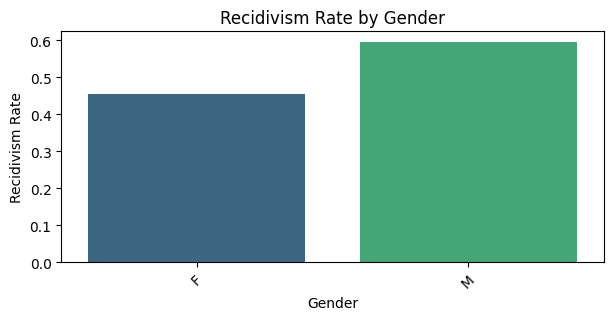

In [ ]:
# Recidivism rate by gender
plot_recidivism_rate(data, 'Gender')


Recidivism Rate by Race:
Race
BLACK    0.586853
WHITE    0.563433
Name: Recidivism_Within_3years, dtype: float64


<ipython-input-22-e6e70e03e505>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=recidivism_rate.index, y=recidivism_rate.values, palette='viridis')


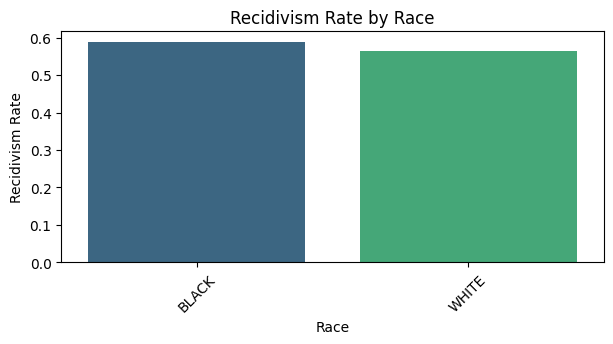

In [ ]:
# Recidivism rate by race
plot_recidivism_rate(data, 'Race')


Recidivism Rate by Education_Level:
Education_Level
At least some college    0.448208
High School Diploma      0.604214
Less than HS diploma     0.605488
Name: Recidivism_Within_3years, dtype: float64


<ipython-input-22-e6e70e03e505>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=recidivism_rate.index, y=recidivism_rate.values, palette='viridis')


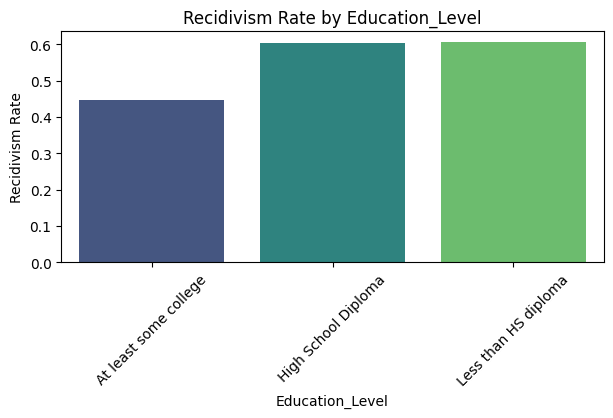

In [ ]:
# Recidivism rate by education level
plot_recidivism_rate(data, 'Education_Level')

<ipython-input-22-e6e70e03e505>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  recidivism_rate = data.groupby(column)['Recidivism_Within_3years'].mean()
<ipython-input-22-e6e70e03e505>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=recidivism_rate.index, y=recidivism_rate.values, palette='viridis')



Recidivism Rate by Age_Group:
Age_Group
18-22          0.719748
23-27          0.664219
28-32          0.614613
33-37          0.572465
38-42          0.529569
43-47          0.506107
48 or older    0.418836
Name: Recidivism_Within_3years, dtype: float64


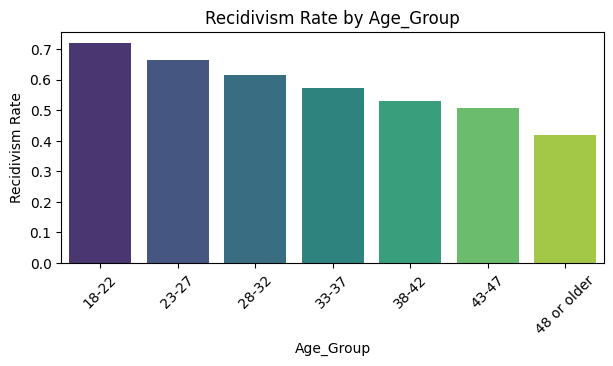

In [ ]:
# Recidivism rate by age group
# First, let's create age groups
data['Age_Group'] = pd.cut(data['Age_at_Release'], bins=[0, 22, 27, 32, 37, 42, 47, float('inf')],
                           labels=['18-22', '23-27', '28-32', '33-37', '38-42', '43-47', '48 or older'])
plot_recidivism_rate(data, 'Age_Group')

### Group Comparisons for Recidivism Rates

#### Recidivism Rate by Gender
- **Females**: Approximately 0.45
- **Males**: Approximately 0.58

**Interpretation**:
- Males have a significantly higher recidivism rate compared to females. This indicates that gender plays a critical role in recidivism, with males being more likely to reoffend within three years of release.

#### Recidivism Rate by Race
- **Black**: Approximately 0.58
- **White**: Approximately 0.54

**Interpretation**:
- Black individuals have a slightly higher recidivism rate compared to White individuals. This suggests that race is a significant factor in recidivism, but the difference between these two groups is not as pronounced as the gender difference.

#### Recidivism Rate by Education Level
- **At least some college**: Approximately 0.42
- **High School Diploma**: Approximately 0.55
- **Less than HS diploma**: Approximately 0.56

**Interpretation**:
- Individuals with higher education levels (at least some college) have lower recidivism rates compared to those with only a high school diploma or less. This highlights the importance of education in reducing recidivism, suggesting that educational programs could be beneficial for reducing reoffending rates.

#### Recidivism Rate by Age Group
- **18-22**: Approximately 0.70
- **23-27**: Approximately 0.66
- **28-32**: Approximately 0.63
- **33-37**: Approximately 0.60
- **38-42**: Approximately 0.57
- **43-47**: Approximately 0.54
- **48 or older**: Approximately 0.48

**Interpretation**:
- Younger age groups have higher recidivism rates, with the highest rate among the 18-22 age group. The recidivism rate decreases progressively with age, indicating that older individuals are less likely to reoffend. This trend suggests that interventions targeting younger individuals might be more crucial for reducing recidivism rates.

### Summary of Insights
- **Gender**: Males have a higher recidivism rate than females.
- **Race**: Black individuals have a slightly higher recidivism rate compared to White individuals.
- **Education Level**: Higher education levels are associated with lower recidivism rates.
- **Age Group**: Younger individuals are more likely to reoffend, with the highest recidivism rate among those aged 18-22.

**Behavioral Analysis**

In [ ]:
# Define function to plot the impact of a numerical column on recidivism
def plot_impact_on_recidivism(data, column):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Recidivism_Within_3years', y=column, data=data, palette='viridis')
    plt.title(f'Impact of {column} on Recidivism')
    plt.xlabel('Recidivism Within 3 Years')
    plt.ylabel(column)
    plt.show()

<ipython-input-27-eb091a048b42>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Recidivism_Within_3years', y=column, data=data, palette='viridis')


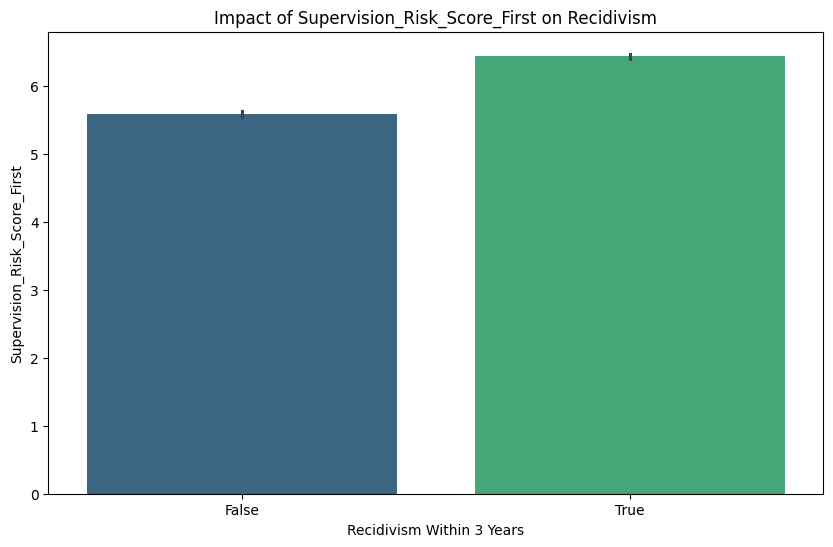

In [ ]:
# Impact of Supervision_Risk_Score_First on recidivism
plot_impact_on_recidivism(data, 'Supervision_Risk_Score_First')

<ipython-input-27-eb091a048b42>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Recidivism_Within_3years', y=column, data=data, palette='viridis')


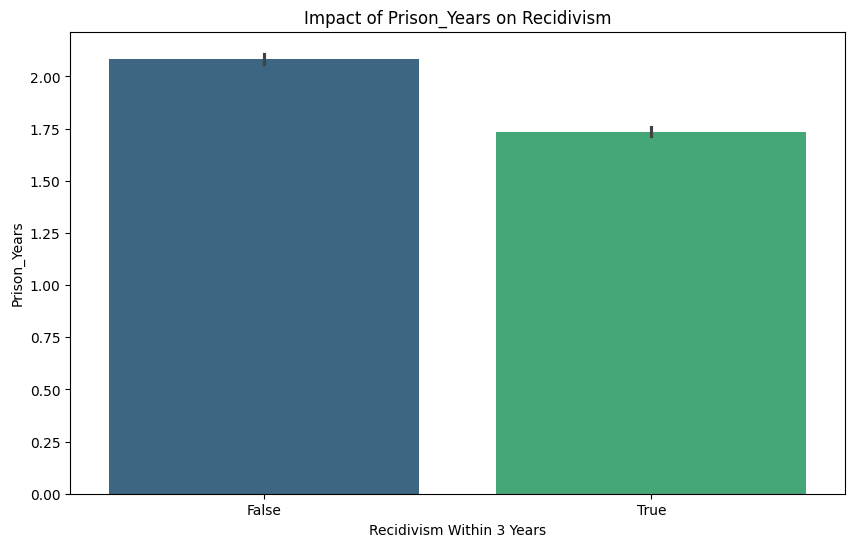

In [ ]:
# Impact of Prison_Years on recidivism
plot_impact_on_recidivism(data, 'Prison_Years')

<ipython-input-27-eb091a048b42>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Recidivism_Within_3years', y=column, data=data, palette='viridis')


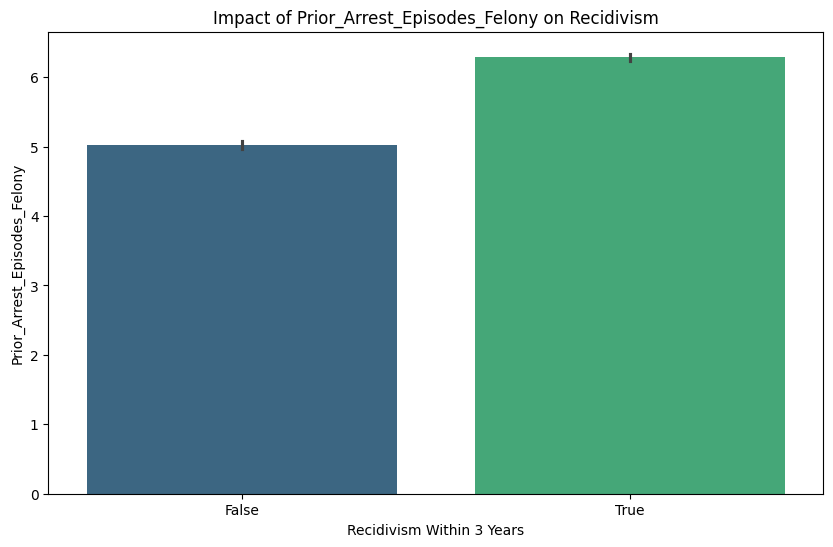

In [ ]:
# Impact of Prior_Arrest_Episodes_Felony on recidivism
plot_impact_on_recidivism(data, 'Prior_Arrest_Episodes_Felony')

<ipython-input-27-eb091a048b42>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Recidivism_Within_3years', y=column, data=data, palette='viridis')


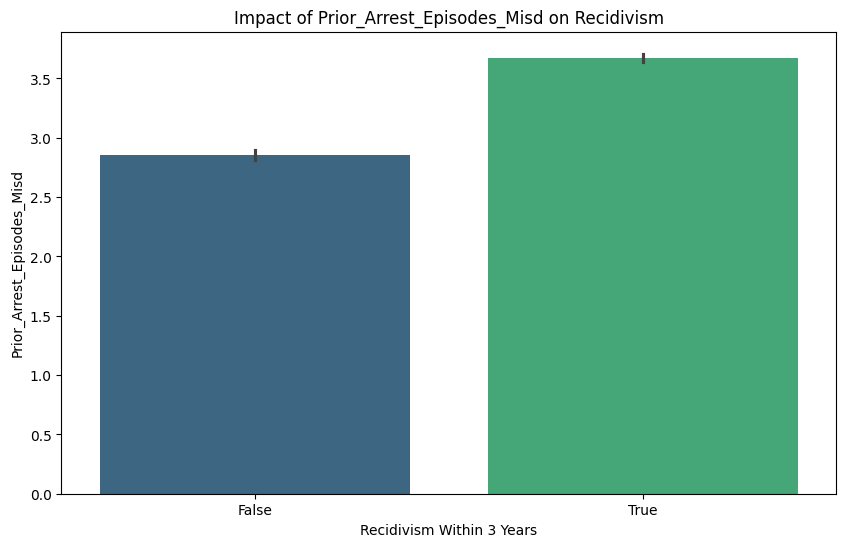

In [ ]:
# Impact of Prior_Arrest_Episodes_Misd on recidivism
plot_impact_on_recidivism(data, 'Prior_Arrest_Episodes_Misd')

<ipython-input-27-eb091a048b42>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Recidivism_Within_3years', y=column, data=data, palette='viridis')


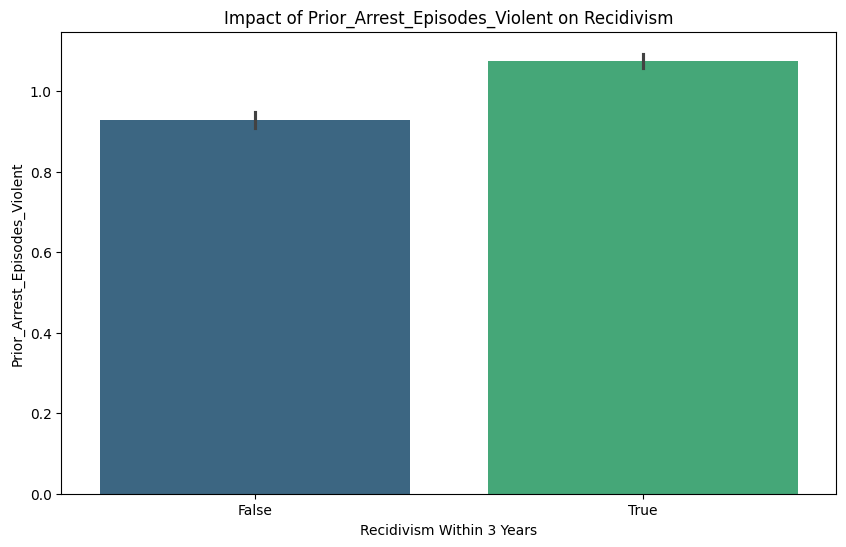

In [ ]:
# Impact of Prior_Arrest_Episodes_Violent on recidivism
plot_impact_on_recidivism(data, 'Prior_Arrest_Episodes_Violent')

<ipython-input-27-eb091a048b42>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Recidivism_Within_3years', y=column, data=data, palette='viridis')


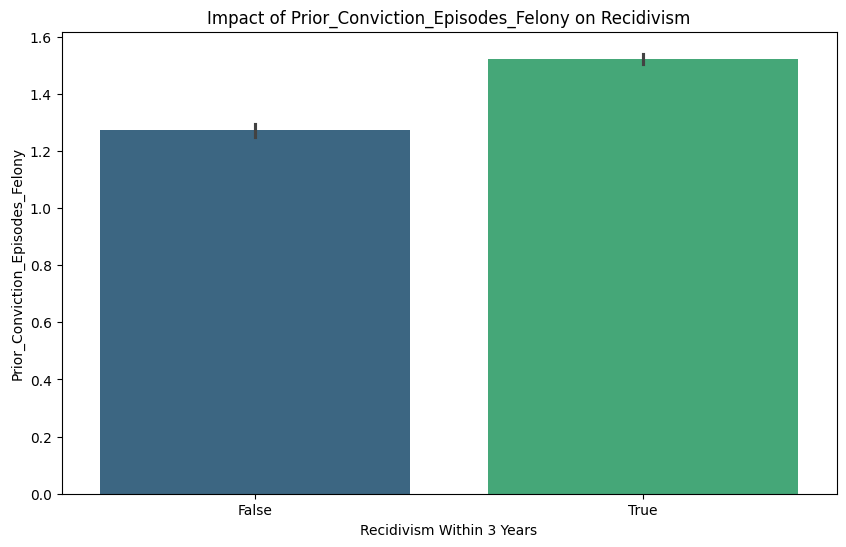

In [ ]:
# Impact of Prior_Conviction_Episodes_Felony on recidivism
plot_impact_on_recidivism(data, 'Prior_Conviction_Episodes_Felony')

<ipython-input-27-eb091a048b42>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Recidivism_Within_3years', y=column, data=data, palette='viridis')


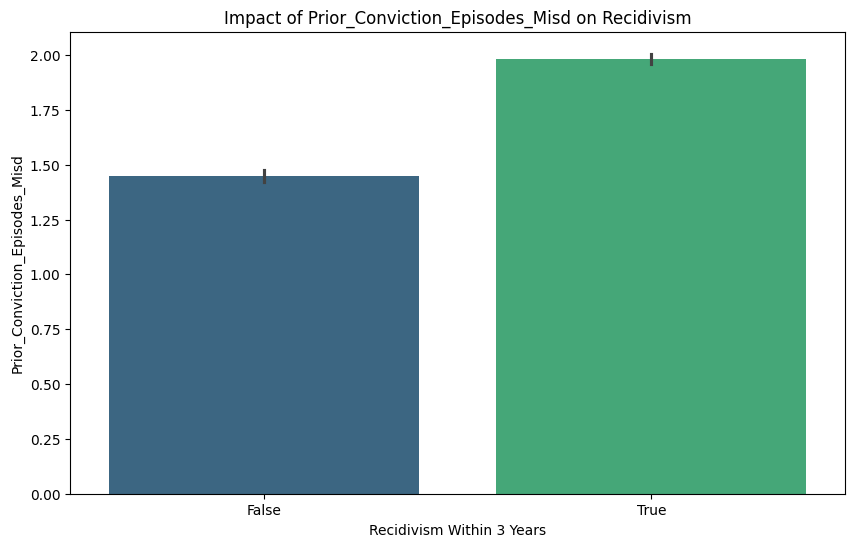

In [ ]:
# Impact of Prior_Conviction_Episodes_Misd on recidivism
plot_impact_on_recidivism(data, 'Prior_Conviction_Episodes_Misd')

<ipython-input-27-eb091a048b42>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Recidivism_Within_3years', y=column, data=data, palette='viridis')


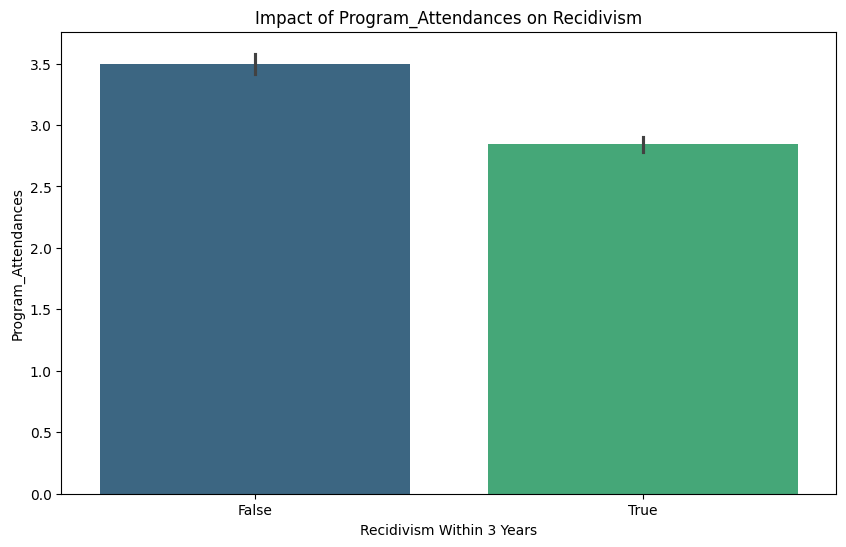

In [ ]:
# Impact of Program_Attendances on recidivism
plot_impact_on_recidivism(data, 'Program_Attendances')

<ipython-input-27-eb091a048b42>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Recidivism_Within_3years', y=column, data=data, palette='viridis')


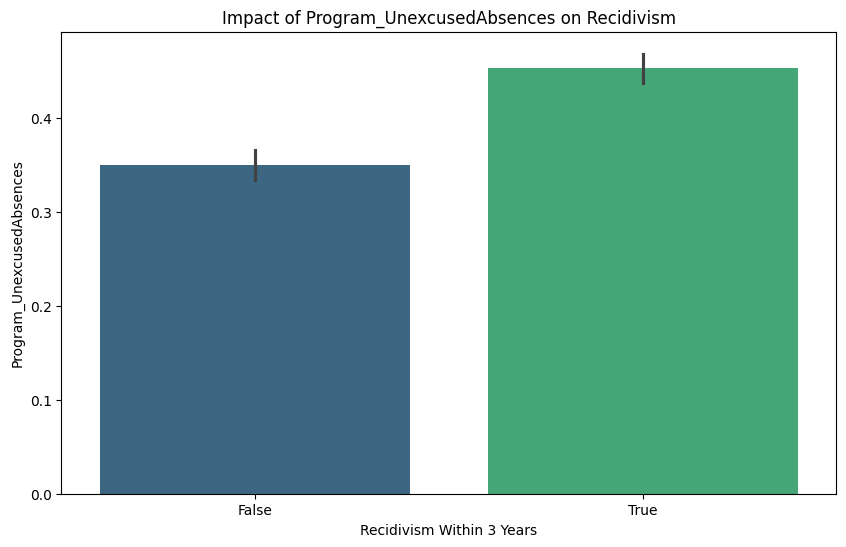

In [ ]:
# Impact of Program_UnexcusedAbsences on recidivism
plot_impact_on_recidivism(data, 'Program_UnexcusedAbsences')

<ipython-input-27-eb091a048b42>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Recidivism_Within_3years', y=column, data=data, palette='viridis')


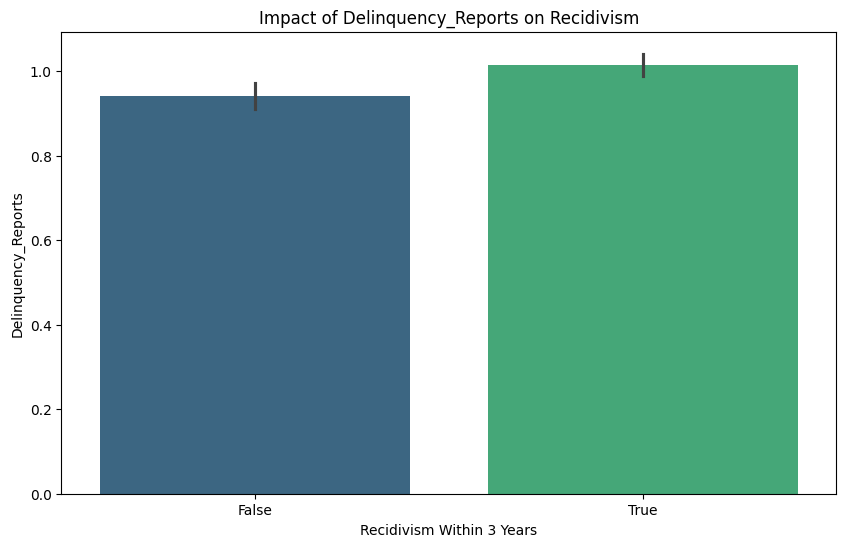

In [ ]:
# Impact of Delinquency_Reports on recidivism
plot_impact_on_recidivism(data, 'Delinquency_Reports')

### Behavioral Analysis Impact on Recidivism

#### 1. Supervision Risk Score First
- **False (No Recidivism)**: Average score around 5
- **True (Recidivism)**: Average score around 6.5

**Interpretation**:
- Individuals who recidivate have higher initial supervision risk scores compared to those who do not. This indicates that higher supervision risk scores are associated with a greater likelihood of recidivism.

#### 2. Prison Years
- **False (No Recidivism)**: Average around 2 years
- **True (Recidivism)**: Average around 1.8 years

**Interpretation**:
- Those who do not recidivate have slightly longer prison sentences on average than those who do recidivate. This might suggest that longer incarceration could have a deterrent effect, although the difference is not very large.

#### 3. Prior Arrest Episodes (Felony)
- **False (No Recidivism)**: Average around 5
- **True (Recidivism)**: Average around 6.5

**Interpretation**:
- Individuals with more prior felony arrests are more likely to recidivate. A higher number of prior felony arrests is a significant predictor of future reoffending.

#### 4. Prior Arrest Episodes (Misdemeanor)
- **False (No Recidivism)**: Average around 3
- **True (Recidivism)**: Average around 3.5

**Interpretation**:
- A higher number of prior misdemeanor arrests also correlates with increased recidivism, though the difference is less pronounced compared to felony arrests.

#### 5. Prior Arrest Episodes (Violent)
- **False (No Recidivism)**: Average around 0.8
- **True (Recidivism)**: Average around 1.1

**Interpretation**:
- More prior violent arrest episodes are associated with higher recidivism, indicating that a history of violence is a risk factor for reoffending.

#### 6. Prior Conviction Episodes (Misdemeanor)
- **False (No Recidivism)**: Average around 1.5
- **True (Recidivism)**: Average around 2

**Interpretation**:
- Similar to arrests, more prior misdemeanor convictions are linked to a higher likelihood of recidivism.

#### 7. Program Attendances
- **False (No Recidivism)**: Average around 3.5
- **True (Recidivism)**: Average around 2.8

**Interpretation**:
- Lower attendance in programs correlates with higher recidivism, suggesting that participation in rehabilitation programs may help reduce the risk of reoffending.

#### 8. Program Unexcused Absences
- **False (No Recidivism)**: Average around 0.3
- **True (Recidivism)**: Average around 0.4

**Interpretation**:
- More unexcused absences from programs are associated with higher recidivism, indicating that commitment to rehabilitation programs is crucial.

#### 9. Delinquency Reports
- **False (No Recidivism)**: Average around 0.9
- **True (Recidivism)**: Average around 1.0

**Interpretation**:
- More delinquency reports correlate with higher recidivism, reinforcing that compliance with supervision and avoiding delinquency is important.

### Summary of Behavioral Insights
- **Higher Supervision Risk Scores**: Strongly associated with recidivism.
- **Prior Arrests and Convictions**: Higher numbers of prior felony, misdemeanor, and violent arrests and convictions are significant predictors of recidivism.
- **Program Participation**: Lower attendance and higher unexcused absences in rehabilitation programs are linked to higher recidivism.
- **Delinquency**: More delinquency reports are associated with a higher likelihood of reoffending.